# **DATA731 - Projet**

**Analyse prédictive des perspectives économiques de l’OCDE**

*Emma ORSET*

*Salma OUKZIZ*

Sujet :

Télécharger les données du Produit Interieur Brut (PIB) trimestriel d’au moins 7 pays de l’OCDE et proposer une analyse fine de ces données par pays, puis une analyse conjointe des dépendances existantes entre pays. Elaborer ensuite des modèles de prédiction linéaires et non-linéaires par pays afin de proposer des prédictions dont on comparera les performances de manière quantitatives. 

**PIB** : Indicateur économique permettant de mesurer la production de richesses d’un pays, le produit intérieur brut (PIB) mesure la valeur de tous les biens et services produits dans un pays sur une année. 

**OCDE** : L'Organisation de coopération et de développement économiques est une organisation internationale d'études économiques, dont les pays membres — des pays développés pour la plupart — ont en commun un système de gouvernement démocratique et une économie de marché.

Dans ce sujet, nous avons pris le PIB par habitant, par trimestre.

# **Préparation des données**

**Importation des modules qui seront utilisés dans le code**

In [ ]:
#Pandas est une librairie python qui permet de manipuler facilement des données à analyser
from pandas import *

#Pour les graphes
import matplotlib.pyplot as plt

#Pour les graphes
import seaborn as sns

#Import du module REGEX pour formater des chaines de caractères
import re

#Permet de trouver un fichier grâce à un pattern
import glob

import statistics

import numpy as np

import math

import random

**Installation de Selenium**

Selenium est un outil d’automatisation de test pour le web. Il permet de créer des « robots » qui naviguent dans des pages webs comme le ferait un vrai utilisateur. Bien que le premier rôle de Selenium soit le testing de pages webs (développement web), cet outil est beaucoup utilisé pour l’extraction de données.

In [ ]:
#On installe selenium
%pip install selenium

#On met à jour selenium pour qu'il corresponde à la dernière mise à jour du driver
%apt-get update 

#On installe le driver de google chrome
%apt install chromium-chromedriver

#Import du webdriver que nous avons choisi (chrome)
from selenium import webdriver

#Configuration du driver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

**Récupération du csv qui contient les données à analyser**

In [ ]:
#Ce lien donne en direct tous les PIB de tous les pays, ça télécharge un .csv à la racine du projet
#Il faut attendre un peu avant que le fichier soit visible 
driver.get("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.QGDP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=fr")

**Lecture du csv**

In [ ]:
#On recherche le dernier fichier qui se termine par .csv à la racine
csv = glob.glob('*.csv')[-1]
#csv = 'DP_LIVE_27102022161254597.csv'

#On lit le fichier
all_data = pandas.read_csv(csv, sep=',')

#On affiche les données sous forme de tableau
all_data


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,QGDP,TOT,PC_CHGPP,A,1962,5.707347,NaN
1,OECD,QGDP,TOT,PC_CHGPP,A,1963,5.230254,NaN
2,OECD,QGDP,TOT,PC_CHGPP,A,1964,6.371945,NaN
3,OECD,QGDP,TOT,PC_CHGPP,A,1965,5.342174,NaN
4,OECD,QGDP,TOT,PC_CHGPP,A,1966,5.783144,NaN
...,...,...,...,...,...,...,...,...
31284,HRV,QGDP,TOT,PC_CHGPY,Q,2021-Q2,16.710666,P
31285,HRV,QGDP,TOT,PC_CHGPY,Q,2021-Q3,14.677527,P
31286,HRV,QGDP,TOT,PC_CHGPY,Q,2021-Q4,10.100531,P
31287,HRV,QGDP,TOT,PC_CHGPY,Q,2022-Q1,6.828871,P


On se rend compte qu'on a beaucoup trop de données.
Certaines colonnes sont innutiles, et il y a trop de pays.

Nous avons décidé de choisir 7 pays d'Europe (Allemagne, Espagne, Grèce, Portugal, Luxembourg, France et Autriche) et le Japon

Nous avons également choisi de nous concentrer sur les années après 2010, et nous analyserons les données par trimestre.

**Tri du csv**

In [ ]:
#On créer une liste pour chaque ISO des pays que nous souhaitons rechercher dans le fichier
list_countries = ['DEU', 'ESP', 'JPN', 'GRC', 'PRT', 'LUX', 'FRA', 'AUT']

#On créer un nouveau DataFrame (tableau) grâce à PANDAS, on ne mettra que les informations utiles dedans
data = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])

#On lance l'itération qui va lire chaque ligne du tableau de base, cette requête est assez longue car le tableau fait plus de 30000 lignes
for i in range(0, len(all_data)):
  #On regarde si l'année commence bien par 201 ou 202 pour avoir les années entre 2010 et de nos jours
  year1 = re.search('201....', all_data.iloc[i,5])
  year2 = re.search('202....', all_data.iloc[i,5])

  #all_data.iloc[x,y] --> On cherche la valeur de la case --> x=ligne=index et y=colonne  (les lignes et colonnes commencent à 0)
  if (all_data.iloc[i,4] == "Q") and (all_data.iloc[i,0] in list_countries) and (year1 or year2) and (all_data.iloc[i,3] == 'PC_CHGPP') and (all_data.iloc[i,5] != "2022-Q3"):
    #On ajoute les données à notre nouveau tableau
    data = data.append({'PAYS' : all_data.iloc[i,0] , 'TRIMESTRE' : all_data.iloc[i,5], 'PIB' : all_data.iloc[i,6]} , ignore_index=True)

data

,PAYS,TRIMESTRE,PIB
0,ESP,2010-Q1,-0.022262
1,ESP,2010-Q2,0.156240
2,ESP,2010-Q3,-0.048540
3,ESP,2010-Q4,0.052271
4,ESP,2011-Q1,-0.150062
...,...,...,...
395,GRC,2021-Q2,1.514037
396,GRC,2021-Q3,2.432416
397,GRC,2021-Q4,0.924017
398,GRC,2022-Q1,2.873258


#**Visualisation des données groupées**

**Création des listes qui vont servir à faire le graphique**

In [ ]:
list_pib=[]
list_date = []

for country in list_countries:
  #on prend les valeurs du pays de la boucle
    df1=data.loc[data['PAYS']==country,:]
    pib = df1['PIB'].values.tolist()
    date = df1['TRIMESTRE'].values.tolist()
    list_pib.append(pib)
    list_date.append(date)

**Création de la vue du graphique**

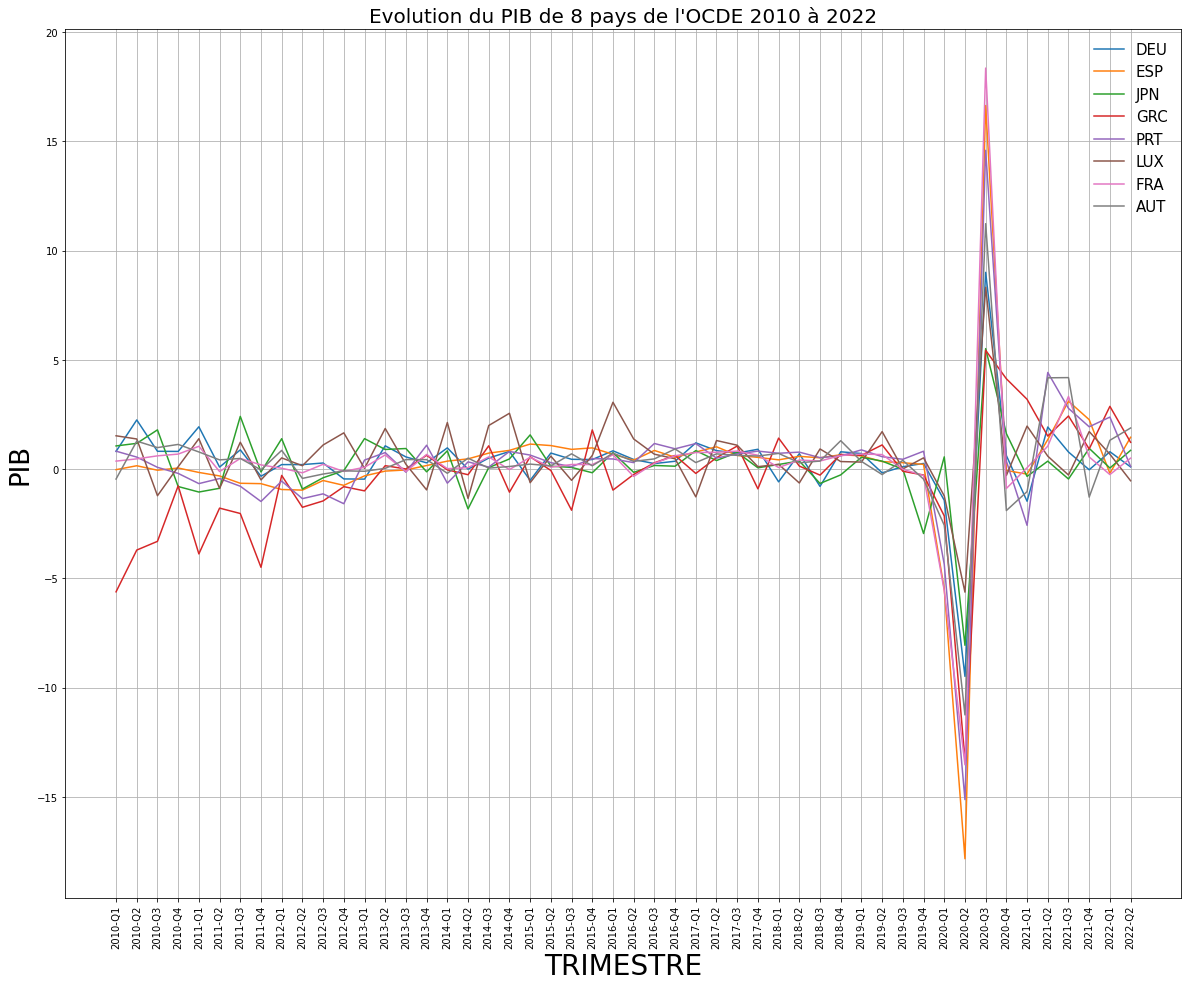

In [ ]:
plt.figure(figsize=(20,16))

for date,pib,label in zip(list_date, list_pib, list_countries) :
    plt.plot(date,pib,label=label)

plt.xlabel('TRIMESTRE', fontsize=28)
plt.ylabel('PIB', fontsize=26)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Evolution du PIB de 8 pays de l\'OCDE 2010 à 2022', fontsize=20)
plt.legend(markerscale = 5, frameon = False,  prop={"size":15})
plt.show()

On remarque qu'il y a une fluctuation très grosse au niveau de 2020, cela est dû à la crise sanitaire du COVID19. On peut se douter que c'est un PIB par habitant car on remarque que le luxembourg a une courbe au dessus des autres alors que c'est un petit pays.

# **Moyenne et médiane**

In [ ]:
listeMoyenne = []
listeMediane = []
for country in list_countries:
    df1=data.loc[data['PAYS']==country,:]
    a = round(df1['PIB'].mean(),2)
    b = round(df1['PIB'].median(),2)
    listeMoyenne.append(a)
    listeMediane.append(b)

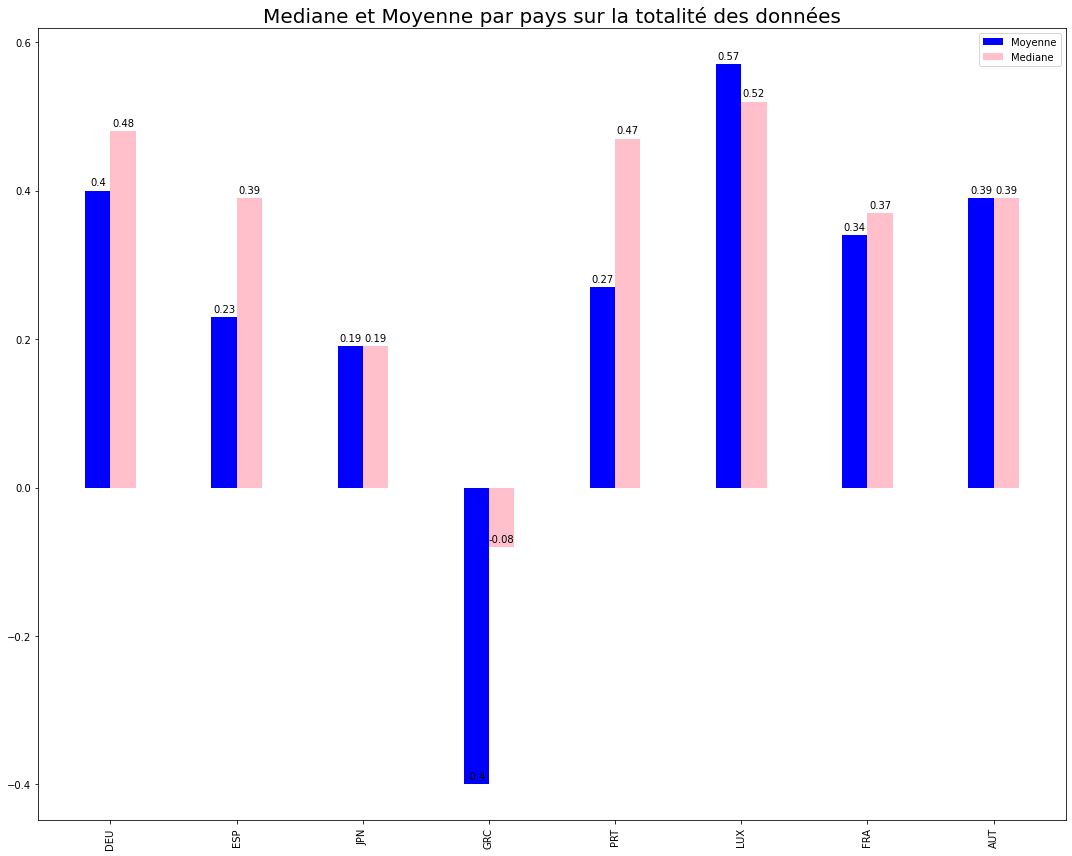

In [ ]:
x = np.arange(len(list_countries))  # the label locations

width = 0.2  # the width of the bars
fig,ax = plt.subplots(figsize=(15,12))
rects1 = ax.bar(x - width/2, listeMoyenne, width, label='Moyenne', color="b")
rects2 = ax.bar(x + width/2, listeMediane, width, label='Mediane', color="pink")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Mediane et Moyenne par pays sur la totalité des données', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(list_countries)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=90)
fig.tight_layout()


plt.show()

Grâce à la médiane, on supprime les données "extrêmes" qui "polluent" les calcules de la moyenne.

#**Corrélation entre les pays**

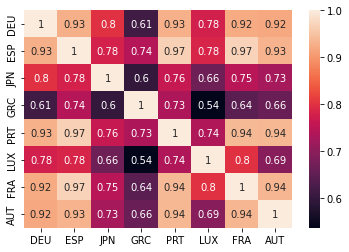

In [ ]:
d = {}
for i in range(0,len(list_countries)):
    d[list_countries[i]]=list_pib[i]

df = pandas.DataFrame(data=d)
mat_corr = df.corr()
sns.heatmap(mat_corr, annot= True)

On remarque que les pays porteurs de l'Union Européenne comme l'Autriche, la France, le Portugale, l'espace et l'Allemagne, sont plutôt très corrélé (tons clairs). Cela signifie que si un de ces pays a une augmentation de son PIB, normalement les autres devraients suivre. Le Luxembourd n'est pas très corrélé aux autres pays car son système économique est très différent des autres, il a beaucoup moins de fluctuation. La Grèce est un pays qui subit beaucoup de crises, et qui sollicite souvent l'aide des autres pays de l'UE, c'est donc normal que ce pays ne soit pas corrélé aux autres. Quant au Japon, qui ne fait pas partit de l'UE, il est finalement plus corrélé qu'on pourrait le penser. C'est peut-être donc à l'internationnal que les PIB sont corrélés.

#**Variance**

Pour mesurer la dispertion des valeurs de PIB on va utiliser la variance.

In [ ]:
list_variance=[]

for country in list_countries:
    df2=data.loc[data['PAYS']==country,:]
    d = df2.rolling(3,min_periods=2).var()
    list_variance.append(d)

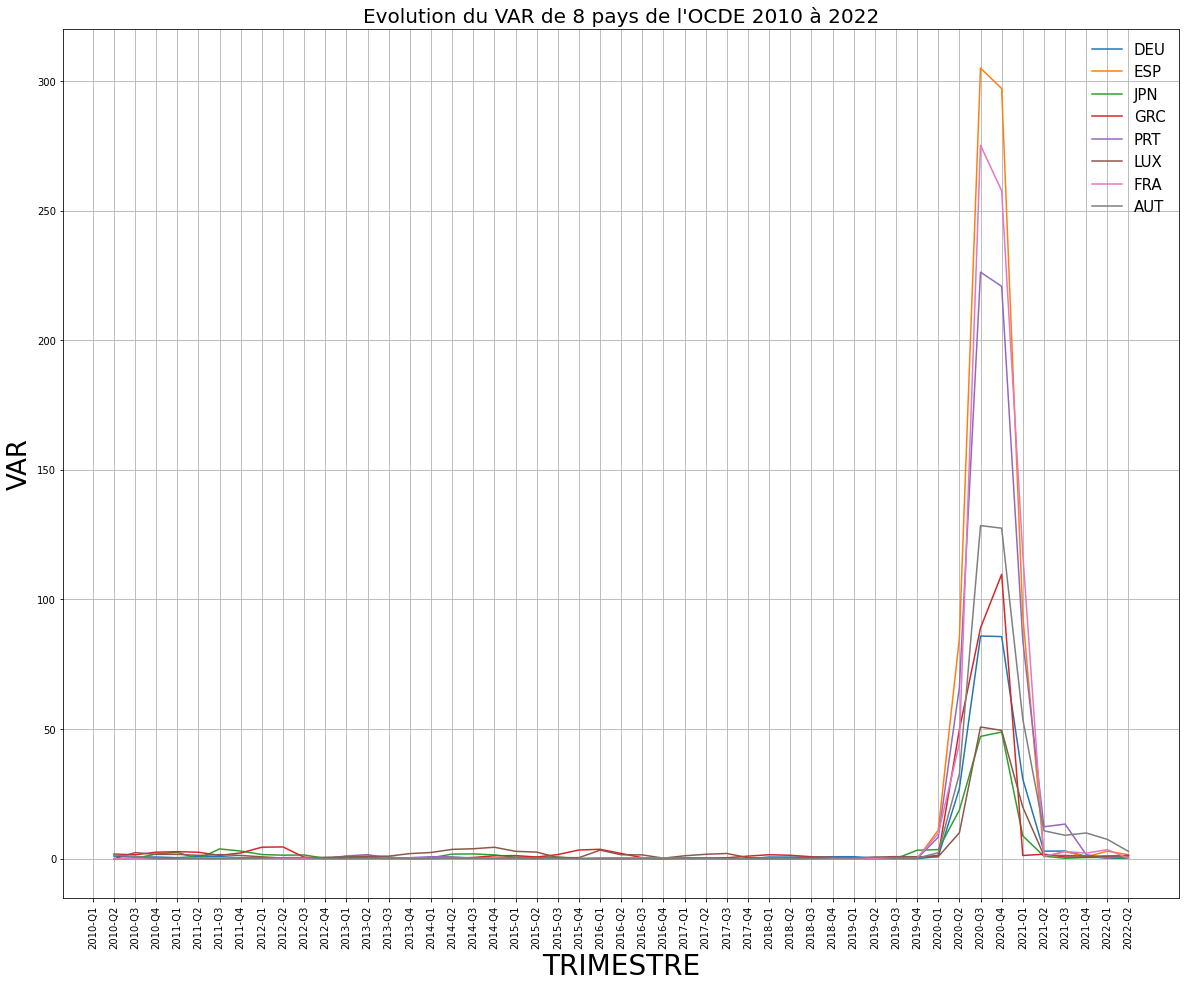

In [ ]:
plt.figure(figsize=(20,16))

for date,var,label in zip(list_date, list_variance, list_countries) :
    plt.plot(date,var,label=label)

plt.xlabel('TRIMESTRE', fontsize=28)
plt.ylabel('VAR', fontsize=26)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Evolution du VAR de 8 pays de l\'OCDE 2010 à 2022', fontsize=20)
plt.legend(markerscale = 5, frameon = False,  prop={"size":15})
plt.show()


On remarque que les PIB sont plutôt constant en période normale, mais très dispéresés en périodes de crises.

# **Variations locales**

**Séparation des dataframes par pays**

Afin de mieux visualiser ce graphe, on va utiliser la moyenne mobile simple.


In [ ]:
df_DEU = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_ESP = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_JPN = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_GRC = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_PRT = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_LUX = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_FRA = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])
df_AUT = pandas.DataFrame([], columns = ['PAYS','TRIMESTRE','PIB'])


for i in range(0, len(data)):
  if (data.iloc[i,0] == "DEU"):
    df_DEU = df_DEU.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)
  
  if (data.iloc[i,0] == "ESP"):
    df_ESP = df_ESP.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)

  if (data.iloc[i,0] == "JPN"):
    df_JPN = df_JPN.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)

  if (data.iloc[i,0] == "GRC"):
    df_GRC = df_GRC.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)

  if (data.iloc[i,0] == "PRT"):
    df_PRT = df_PRT.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)

  if (data.iloc[i,0] == "LUX"):
    df_LUX = df_LUX.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)

  if (data.iloc[i,0] == "FRA"):
    df_FRA = df_FRA.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)

  if (data.iloc[i,0] == "AUT"):
    df_AUT = df_AUT.append({'PAYS' : data.iloc[i,0], 'TRIMESTRE' : data.iloc[i,1], 'PIB' : data.iloc[i,2]} , ignore_index=True)


list_all_df = [df_DEU, df_ESP, df_JPN, df_GRC, df_PRT, df_LUX, df_FRA, df_AUT]


**Moyenne mobile pour chaque dataframe**

In [ ]:
for df in range(0,len(list_all_df)):
  list_all_df[df]["MM"] = list_all_df[df]['PIB'].rolling(40).mean()

**Visualisation des moyennes mobiles**

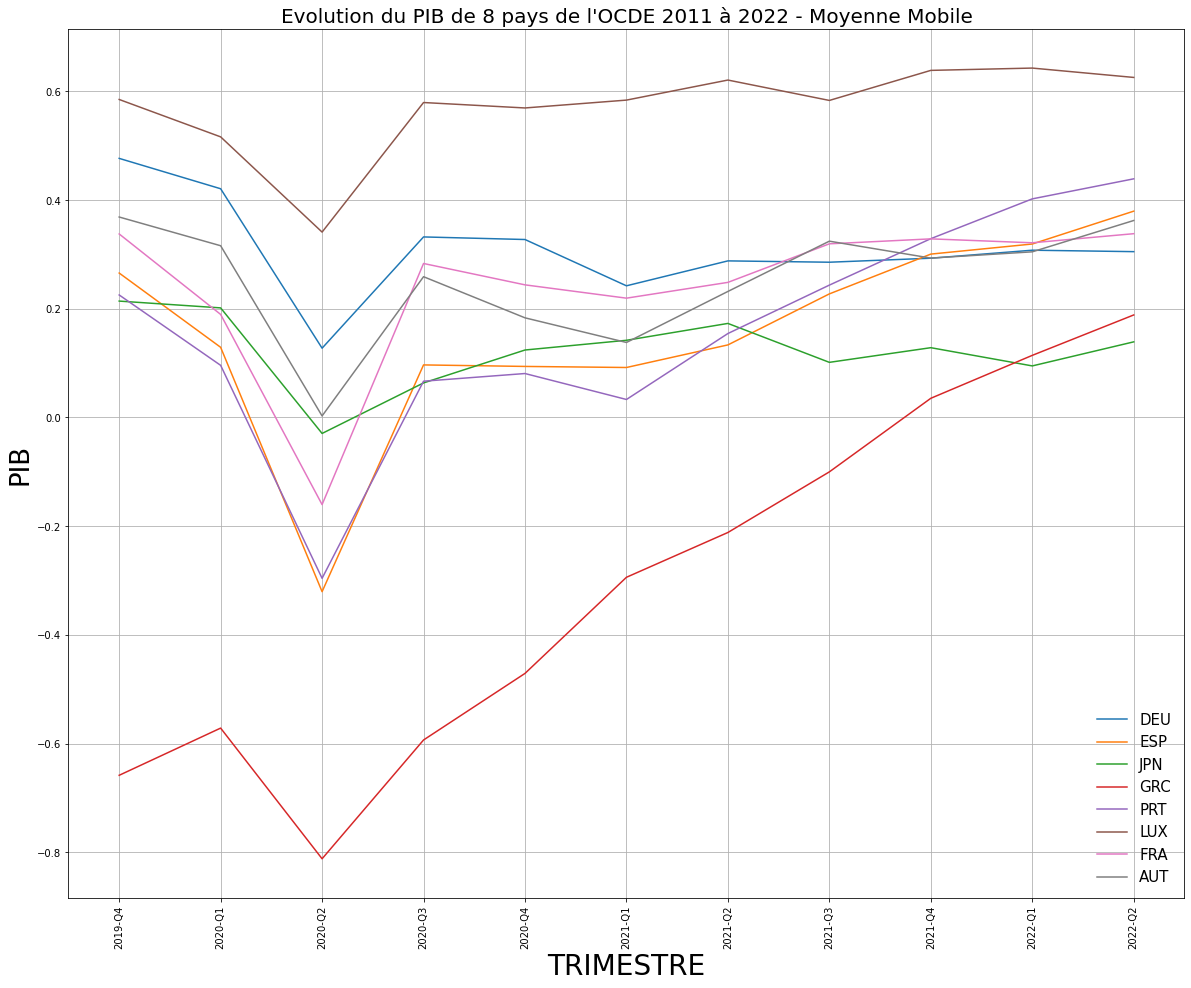

In [ ]:
plt.figure(figsize=(20,16))

i=0
for country in list_countries:
  plt.plot(list_all_df[i]["TRIMESTRE"], list_all_df[i]['MM'], label=country)
  i+=1

plt.xlabel('TRIMESTRE', fontsize=28)
plt.ylabel('PIB', fontsize=26)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Evolution du PIB de 8 pays de l\'OCDE 2011 à 2022 - Moyenne Mobile', fontsize=20)
plt.legend(markerscale = 5, frameon = False,  prop={"size":15})
plt.show()


Grâce à la moyenne mobile, on peut analysé plus précisément les valeurs du PIB des pays. En effet, avec la moyenne et la médiane, on perd l'information que la Grèce est sur une pente ascendente de son PIB.

# **Modèle autorégressif à l'ordre 2**

[0.44985939 0.18456493]


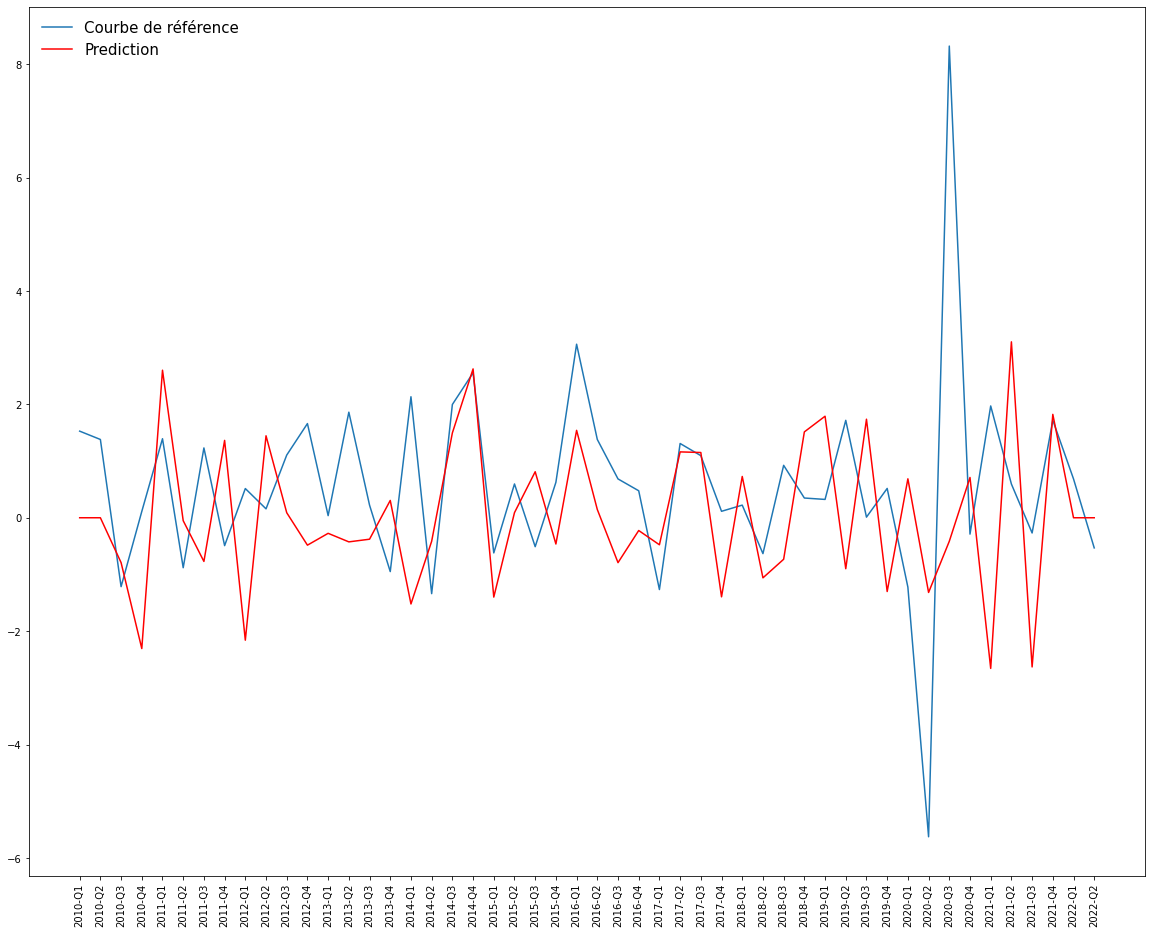

In [ ]:
def auto_cov(data, n):
    mean = sum(data)/len(data)
    autocov = []
    for h in range(len(data)):
        sigma = []
        for t in range(1, n - h):
            sigma.append((data[t+h] - mean) * (data[t] - mean))
        autocov.append((1/n) * sum(sigma))
    return autocov

def estim_ar2(auto_cor):
    elt = np.array([[auto_cor[0], auto_cor[1]], [auto_cor[1], auto_cor[0]]])
    r = -np.array([auto_cor[1], auto_cor[2]])
    return np.dot(np.linalg.inv(elt), r)

def predict(data, coeff):
    predict_sig = [0 for i in range(len(data))]
    for k in range(1, len(data)-3):
        predict_sig[k + 1] = random.gauss(0, 1) - coeff[0] * predict_sig[k] - coeff[1] * predict_sig[k - 1]
    return predict_sig

fra = data.loc[(data["PAYS"]=="LUX")]
x = fra["TRIMESTRE"].tolist()
signal = fra["PIB"].tolist()


auto_cov_sig = auto_cov(signal, len(signal))
auto_cor_sig = [auto_cov_sig[k]/auto_cov_sig[0] for k in range(len(auto_cov_sig))]

coeff = estim_ar2(auto_cor_sig)
print(coeff)
predict_sig = predict(signal, coeff)
plt.figure(figsize=(20,16))
plt.plot(x, signal, label='Courbe de référence',)
plt.plot(x, predict_sig, label='Prediction', color = "r")
plt.xticks(rotation=90)
plt.legend(markerscale = 5, frameon = False,  prop={"size":15})

plt.show()

On remarque que même si la courbe n'est pas supperposable de partoutn les prédictions sont plutôt justes. Quand la courbe de prédiction augmente, on a bien une augmentation du PIB sur la courbe réelle


# **CONCLUSION**

Finalement, même si les pays de l'OCDE sont censés être des pays ayant une économie de marché similaire, on se rend compte qu'ils ne suivent pas tous les mêmes tendances. Certains pays restent étroitement liés, tandis que d'autres subissent plus facilement des crises ou bien ont une économie plus riche.